## Adversarial Attack Visualization

This notebook is to demonstrate how to generate adversarial images using the `adversarial-noise-generator` library and visualize the effects of different attack strategies.

### 1. Setup

First,  the necessary modules are improted from the library and PyTorch.


In [1]:
import torch
import os
from adversarial.models import load_model
from adversarial.attacks import apply_fgsm_attack
from adversarial.utils import preprocess_image, postprocess_image
from PIL import Image
import matplotlib.pyplot as plt


### Load a Pre-trained Model

Let's load a pre-trained ResNet model.

In [2]:
model = load_model('resnet18', pretrained=True)

C:\Users\regina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\regina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)




Loading an image and preprocess it.


In [3]:

epsilon = 0.02  # Perturbation magnitude
target_class_id = 208 

image_folder_path = './sample_images/'

##### Generate an Adversarial Image

Generating  an adversarial image using the FGSM attack of the the sample images


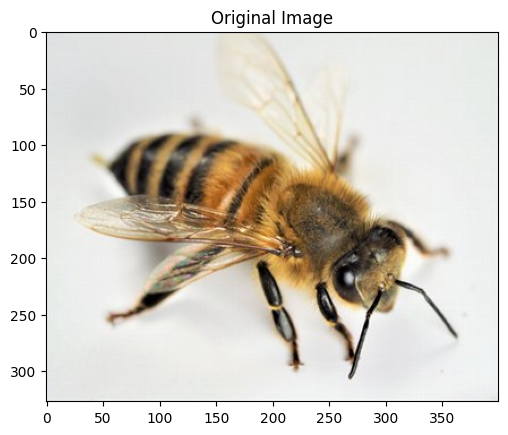

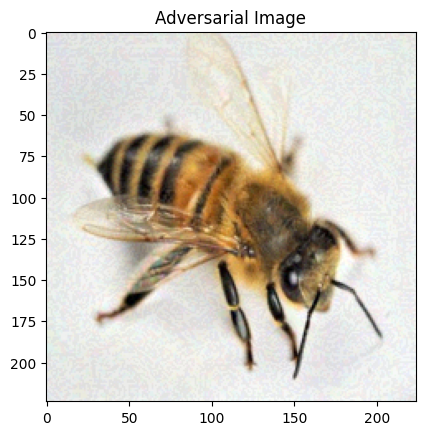

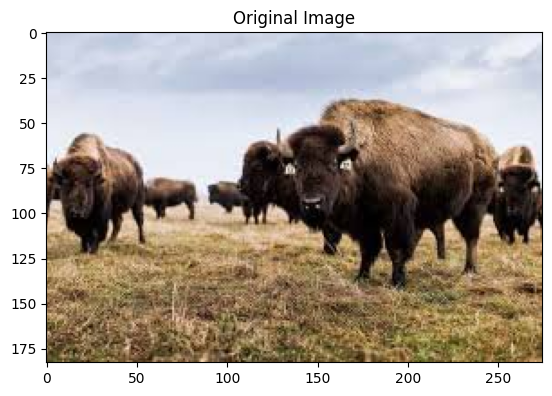

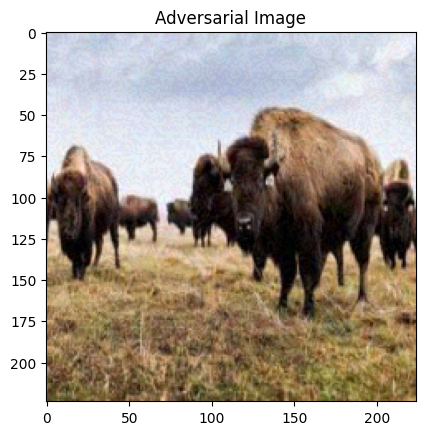

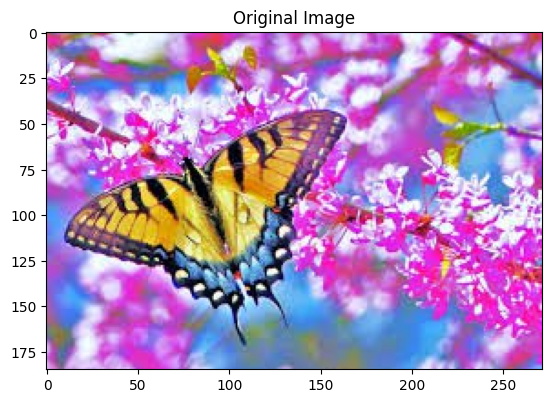

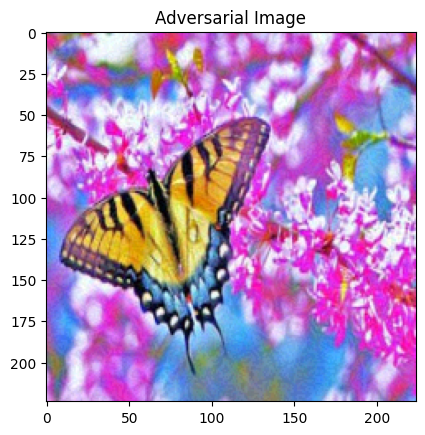

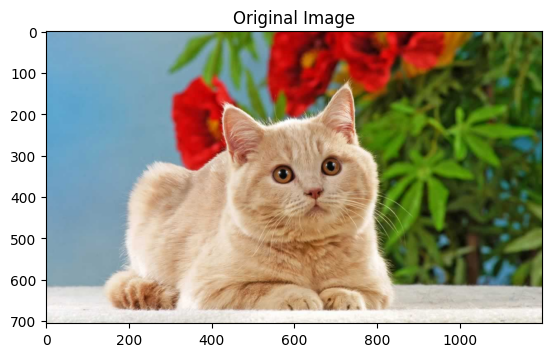

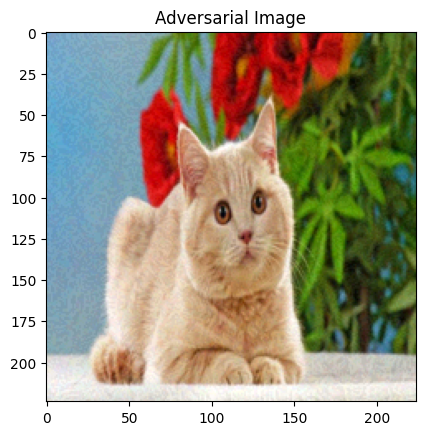

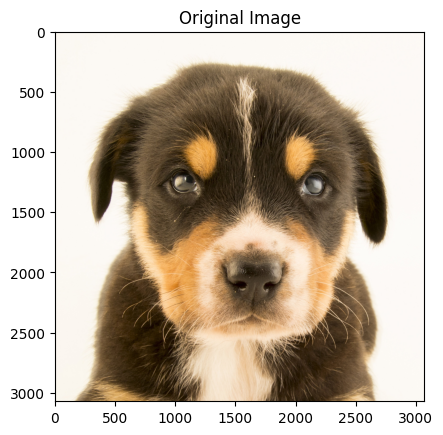

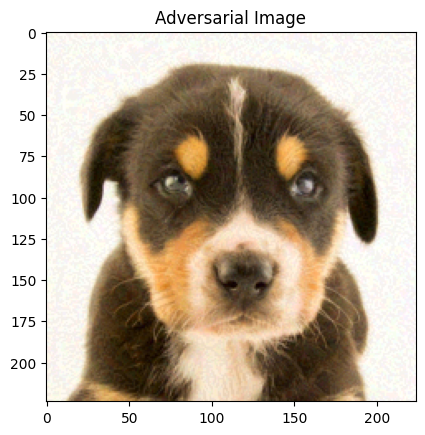

In [4]:


for filename in os.listdir(image_folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(image_folder_path, filename)
        image_tensor = preprocess_image(image_path)

        # Display the original image
        plt.imshow(Image.open(image_path))
        plt.title('Original Image')
        plt.show()

        target = torch.tensor([target_class_id], dtype=torch.long)
        adversarial_image_tensor = apply_fgsm_attack(image_tensor, target, model, epsilon)

        # Display the adversarial image
        adversarial_image = postprocess_image(adversarial_image_tensor)
        plt.imshow(adversarial_image)
        plt.title('Adversarial Image')
        plt.show()

